# 第3章 神经网络

神经网络的一个重要性质是它可以自动地从数据中学习到合适的权重参数。

## 3.1 从感知机到神经网络


### 3.1.1 神经网络的例子

![图3-1.神经网络的例子](../images/图3-1.神经网络的例子.PNG)
图3-1.神经网络的例子

输入层、中间层（隐藏层）、输出层

### 3.1.2 复习感知机

![图3-2.复习感知机](../images/图3-2.复习感知机.PNG)
图3-2.复习感知机


![图3-3.明确表示出偏置](../images/图3-3.明确表示出偏置.PNG)
图3-3.明确表示出偏置

$$ y = \begin{cases} 0 \quad(b + w_1x_1 + w_2x_2 \le 0) \\ 1 \quad(b + w_1x_1 + w_2x_2 > 0) \end{cases} \tag{3.1} $$

$b$是偏置参数，控制神经元被激活的容易程度；
$w_1$和$w_2$表示各个信号权重的参数，控制各个信号的重要性。

$$ y = h(b + w_1x_1 + w_2x_2) \tag{3.2} $$

$$ h(x) = \begin{cases} 0 \quad (x\le 0) \\ 1 \quad (x>0) \end{cases} \tag{3.3} $$

### 3.1.3 激活函数登场

$h(x)$ 函数会将输入信号的总和转换为输出信号，这种函数一般称为**激活函数**。
激活函数决定如何激活输入信号的总和。

$$
    a = b + w_1x_1 + w_2x_2 \tag{3.4}
$$

$$
    y = h(a)    \tag{3.5}
$$

![图3-4.明确显示激活函数的计算过程](../images/图3-4.明确显示激活函数的计算过程.PNG)
图3-4.明确显示激活函数的计算过程


![图3-5](../images/图3-5.PNG)
图3-5

激活函数是连接感知机和神经网络的桥梁。

## 3.2 激活函数

阶跃函数：激活函数以阈值为界，一旦输入超过阈值，就切换输出。

感知机中使用了阶跃函数作为激活函数。

### 3.2.1 sigmoid函数

sigmoid：S形的

$$ h(x) = \frac{1}{1 + \exp(-x)} \tag{3.6} $$

$exp(-x)$表示$e^{-x}$

感知机和神经网络的区别就在于激活函数。

### 3.2.2 阶跃函数的实现

In [80]:
# 阶跃函数
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0


# 支持numpy数组的实现
def step_function_numpy(x):
    y = x > 0
    return y.astype(np.int)  # astype(np.int)将bool转换为int

In [81]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [82]:
y = x > 0
print(y)

[False  True  True]


In [83]:
y = y.astype(np.int32)
y

array([0, 1, 1])

### 3.2.3 阶跃函数的图形

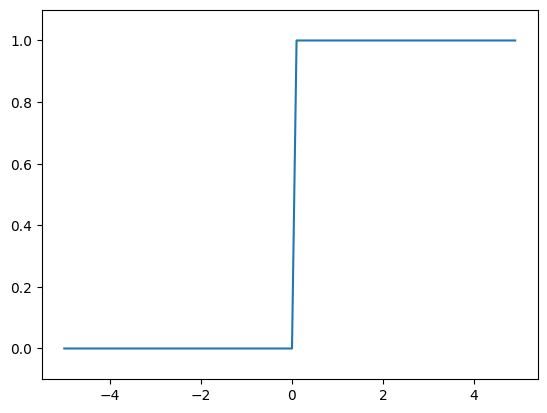

In [84]:
import numpy as np
import matplotlib.pyplot as plt


def step_function(x):
    return np.array(x > 0, dtype=int)


x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # 指定y轴的范围
plt.show()

### 3.2.4 sigmoid函数的实现

In [85]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [86]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [87]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [88]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

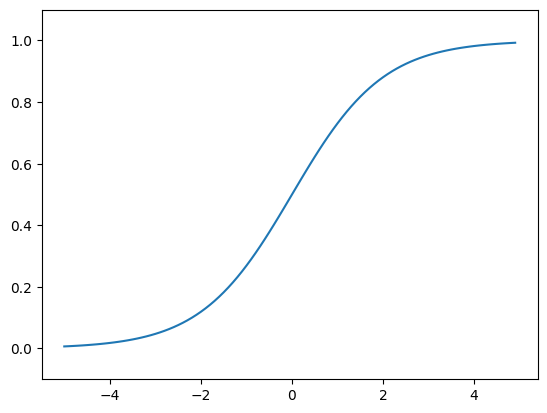

In [89]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # 指定y轴的范围
plt.show()

### 3.2.5 sigmoid函数和阶跃函数的比较

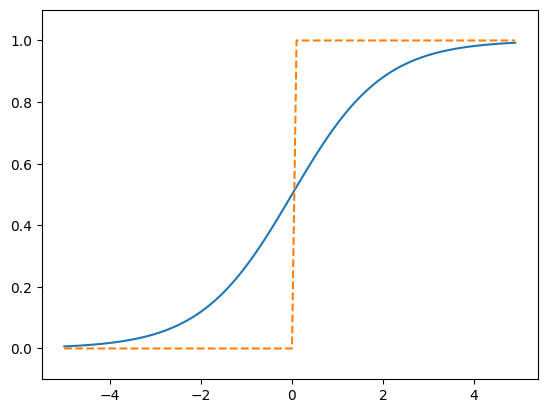

In [90]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
y1 = step_function(x)
plt.plot(x, y)
plt.plot(x, y1, '--')
plt.ylim(-0.1, 1.1)  # 指定y轴的范围
plt.show()

sigmoid函数和阶跃函数的共同性质：
* 输入小时，输出接近0，输入增大，输出向1靠近。
* 即当输入信号为重要信息时，阶跃函数和sigmoid函数都会输出较大值；
* 输入信号为不重要的信息时，两者都会输出较小的值。
* 输出信号在0和1之间。

### 3.2.6 非线性函数

线性函数：输出值是输入值常数倍的函数。

$$h(x)=cx, \ c是常数$$

sigmoid函数和阶跃函数都是**非线性函数**。

神经网络的激活函数必须使用非线性函数。因为使用线性函数，加神经网络的层数就没有意义了。

$y(x)=h(h(x))$ 等价于 $y(x)=c^2x$

### 3.2.7 ReLU函数

ReLU（Rectified Linear Unit, 修正线性单元，线性整流）函数

* 输入大于0，直接输出该值
* 输入小于0，输出0

$$ h(x) = \begin{cases} x \quad (x>0) \\
                        0 \quad (x \le 0)
          \end{cases} \tag{3.7} $$


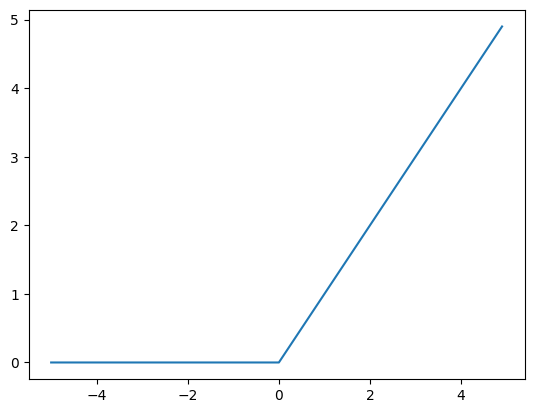

In [91]:
def relu(x):
    return np.maximum(0, x)


x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.show()

## 3.3 多维数组的运算



In [92]:
import numpy as np

A = np.array([1, 2, 3, 4])
A

array([1, 2, 3, 4])

In [93]:
np.ndim(A)

1

In [94]:
A.shape

(4,)

In [95]:
A.shape[0]

4

In [96]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [97]:
np.ndim(B)

2

In [98]:
B.shape

(3, 2)

### 3.3.2 矩阵乘法

In [99]:
A = np.array([[1, 2], [3, 4]])
A.shape

(2, 2)

In [100]:
B = np.array([[5, 6], [7, 8]])
B.shape

(2, 2)

In [101]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [102]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A.shape

(2, 3)

In [103]:
B = np.array([[1, 2], [3, 4], [5, 6]])
B.shape

(3, 2)

In [104]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [105]:
C = np.array([[1, 2], [3, 4]])
C.shape

(2, 2)

In [106]:
A.shape

(2, 3)

In [107]:
# np.dot(A, C) # ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [108]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A.shape

(3, 2)

In [109]:
B = np.array([7, 8])
B.shape

(2,)

In [110]:
np.dot(A, B)

array([23, 53, 83])

### 3.3.3 神经网络的内积

In [111]:
X = np.array([1, 2])
X.shape

(2,)

In [112]:
W = np.array([[1, 3, 5], [2, 4, 6]])
W

array([[1, 3, 5],
       [2, 4, 6]])

In [113]:
Y = np.dot(X, W)
Y

array([ 5, 11, 17])

## 3.4 3层神经网络的实现

![图3-15.3层神经网络](../images/图3-15.3层神经网络.PNG)
图3-15.3层神经网络

### 3.4.1 符号确认

![图3-16.权重的符号](../images/图3-16.权重的符号.PNG)
图3-16.权重的符号

神经网络的运算可以作为矩阵运算打包进行。

### 3.4.2 各层间信号传递的实现

![图3-17.从输入层到第1层的信号传递](../images/图3-17.从输入层到第1层的信号传递.PNG)
图3-17.从输入层到第1层的信号传递


In [114]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

In [115]:
W1.shape, X.shape, B1.shape

((2, 3), (2,), (3,))

In [116]:
A1 = np.dot(X, W1) + B1
A1

array([0.3, 0.7, 1.1])

In [117]:
Z1 = sigmoid(A1)

A1, Z1

(array([0.3, 0.7, 1.1]), array([0.57444252, 0.66818777, 0.75026011]))

![图3-18.从输入层到第1层的信号传递](../images/图3-18.从输入层到第1层的信号传递.PNG)
图3-18.从输入层到第1层的信号传递

In [150]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [151]:
Z1.shape, W2.shape, B2.shape

((3,), (3, 2), (2,))

In [152]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

![图3-19.第1层到第2层的信号传递](../images/图3-19.第1层到第2层的信号传递.PNG)
图3-19.第1层到第2层的信号传递

In [121]:
# 恒等函数
def identity_function(x):
    return x

In [122]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [123]:
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)  # 或 Y = A3

输出层激活函数根据要求解的问题的性质决定：
* 回归问题用恒等函数
* 二元分类问题用sigmoid函数
* 多元分类问题用softmax函数

![图3-20.从第2层到输出层的信号传递](../images/图3-20.从第2层到输出层的信号传递.PNG)
图3-20.从第2层到输出层的信号传递

### 3.4.3 代码实现小结

In [124]:
def init_network():
    """
    权重和偏置的初始化
    """
    network = {}

    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

In [125]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

In [126]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)  # [ 0.31682708 0.69627909]

[0.31682708 0.69627909]


*forward（前向）*：从输入到输出方向的传递处理。
*backward（后向）*：从输出到输入方向的处理。

## 3.5 输出层的设计

机器学习的问题大致可以分为分类和回归。

神经网络可以用在分类问题和回归问题上，不过需要根据情况改变输出
层的激活函数。一般而言，回归问题用恒等函数，分类问题用softmax函数。



### 3.5.1 恒等函数和 softmax 函数


![图3-21.恒等函数](../images/图3-21.恒等函数.PNG)
图3-21.恒等函数

分类问题中使用softmax函数可以用 式3.10 表示。

$$ y_k = \frac{\exp(a_{k})}{\sum_{i=1}^n \exp(a_{i})} \tag{3.10} $$

![图3-22.softmax函数](../images/图3-22.softmax函数.PNG)
图3-22.softmax函数



In [127]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
exp_a

array([ 1.34985881, 18.17414537, 54.59815003])

In [128]:
sum_exp_a = np.sum(exp_a)  # 指数函数的和
sum_exp_a

74.1221542101633

In [129]:
y = exp_a / sum_exp_a
y

array([0.01821127, 0.24519181, 0.73659691])

In [130]:
def softmax(x):
    exp_a = np.exp(x)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.2 实现 softmax 函数时的注意事项

溢出问题

softmax 函数的实现可以进行改进：  

![式3.11](../images/式3.11.PNG)

这里的 C' 可以使用任何值，但是为了防止溢出，一般会使用输入信号中的最大值。

In [153]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))  # softmax 函数的运算

C:\Users\ymm\AppData\Local\Temp\ipykernel_7904\578380192.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a)) # softmax 函数的运算
C:\Users\ymm\AppData\Local\Temp\ipykernel_7904\578380192.py:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a)) # softmax 函数的运算


array([nan, nan, nan])

In [154]:
c = np.max(a)  # 1010
a - c

array([  0, -10, -20])

In [155]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [135]:
# 防溢出的softmax函数
def softmax(a):
    c = np.max(a)  # 取输入的最大值
    exp_a = np.exp(a - c)  # 溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.3 softmax 函数的特征

In [136]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
y

array([0.01821127, 0.24519181, 0.73659691])

In [137]:
np.sum(y)

1.0

* softmax 函数的输出是 0.0 到 1.0 之间的实数。
* 并且，softmax函数的输出值的总和是 1。输出总和为 1 是 softmax 函数的一个重要性质。正
因为有了这个性质，我们才可以把 softmax 函数的输出解释为“概率”。

一般而言，神经网络只把输出值最大的神经元所对应的类别作为识别结果。
并且，即便使用softmax函数，输出值最大的神经元的位置也不会变。因此，
神经网络在进行分类时，输出层的softmax函数可以省略。

求解机器学习问题的步骤可以分为“学习” 和“推理”两个阶段。首
先，在学习阶段进行模型的学习B，然后，在推理阶段，用学到的
模型对未知的数据进行推理（分类）。

### 3.5.4 输出层的神经元数量

输出层的神经元数量需要根据待解决的问题来决定。

分类问题的输出层的神经元的数量一般设定为类别的数量。

## 3. 6 手写数字识别

推理处理也称为神经网络的**前向传播**（forward propagation）。

和求解机器学习问题的步骤（分成学习和推理两个阶段进行）一样，
使用神经网络解决问题时，也需要首先使用训练数据（学习数据）进
行权重参数的学习；进行推理时，使用刚才学习到的参数，对输入
数据进行分类。


### 3.6.1 MNIST 数据集

```shell
# 执行脚本mnist.py下载数据集数据。
../dataset/mnist.py
```

In [156]:
import sys, os

sys.path.append(os.pardir)  # 为了导入父目录中的文件而进行的设定
from dataset.mnist import load_mnist

# 第一次调用会花费几分钟 ......
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
# 输出各个数据的形状
print(x_train.shape)  # (60000, 784)
print(t_train.shape)  # (60000,)
print(x_test.shape)  # (10000, 784)
print(t_test.shape)  # (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


load_mnist(normalize=True, flatten=True, one_hot_label=False)
* normalize 设置是否将输入图像正规化为 0.0～1.0 的值。如果将该参数设置为 False，则输入图像的像素会保持原来的 0～255。
* flatten 设置是否展开输入图像（变成一维数组）。如果将该参数设置为 False，则输入图像为 1 × 28 × 28 的三维数组；
若设置为 True，则输入图像会保存为由 784 个元素构成的一维数组。
* one_hot_label 设置是否将标签保存为 one-hot 表示（one-hot representation）。one-hot 表示是仅正确解标签为 1，其余
皆为 0 的数组，就像 [0,0,1,0,0,0,0,0,0,0] 这样。当 one_hot_label 为 False 时，
只是像 7、2 这样简单保存正确解标签；当 one_hot_label 为 True 时，标签则保存为 one-hot 表示。

In [157]:
import sys, os

sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()


# load_mnist 函数以“( 训练图像 , 训练标签 )，( 测试图像，测试标签 )”的形式返回读入的 MNIST 数据。
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]
print(label)  # 5
print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 把图像的形状变成原来的尺寸
print(img.shape)  # (28, 28)
img_show(img)

5
(784,)
(28, 28)


### 3.6.2 神经网络的推理处理

In [140]:
import pickle


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

In [141]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 获取概率最高的元素的索引
    if p == t[i]:
        accuracy_cnt += 1
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


把数据限定到某个范围内的处理称为**正规化**（normalization）。
对神经网络的输入数据进行某种既定的转换称为**预处理**（pre-processing）。
**数据白化**（whitening）：将数据整体的分布形状均匀化的方法

### 3.6.3 批处理

In [142]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [143]:
x.shape

(10000, 784)

In [144]:
x[0].shape

(784,)

In [145]:
W1.shape

(784, 50)

In [146]:
W2.shape

(50, 100)

In [147]:
W3.shape

(100, 10)


![图3-26.数组形状的变化](/images/图3-26.数组形状的变化.PNG)
图3-26　数组形状的变化

![图3-27.批处理中数组形状的变化](/images/图3-27.批处理中数组形状的变化.PNG)
图3-27.批处理中数组形状的变化

打包式的输入数据称为**批**（batch）。

In [148]:
x, t = get_data()
network = init_network()
batch_size = 100  # 批数量
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i + batch_size])
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


## 3.7 小结
